In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Specify the file path
file_path = "Output\credit-card-fraud-data.csv"

# Read the CSV file
cleaned_data = pd.read_csv(file_path)

# Print the head of the DataFrame
cleaned_data.head()

,Number ID,Province/State,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Victim Age Range,Dollar Loss
0,1,Saskatchewan,Merchandise,Other/unknown,Male,60-69,222.73
1,2,British Columbia,Vendor Fraud,Text message,Male,10-19,300.00
2,3,Yukon,Spear Phishing,Email,Male,70-79,1600.00
3,4,Alberta,Extortion,Internet-social network,Male,40-49,24000.00
4,5,Prince Edward Island,Merchandise,Internet,Male,30-39,11000.00


In [3]:
# 2. Province/State Distribution
num_transactions = len(cleaned_data)
print("Number of unique transactions:", num_transactions)

Number of unique transactions: 1000


In [4]:
# 2. Number of unique provinces/states
num_provinces_states = cleaned_data['Province/State'].nunique()
print("Number of unique provinces/states:", num_provinces_states)

Number of unique provinces/states: 20


In [5]:
# 3. Number of unique fraud and cybercrime thematic categories
num_fraud_categories = cleaned_data['Fraud and Cybercrime Thematic Categories'].nunique()
print("Number of unique fraud and cybercrime thematic categories:", num_fraud_categories)

Number of unique fraud and cybercrime thematic categories: 23


In [6]:
# 4. Number of unique solicitation methods
num_solicitation_methods = cleaned_data['Solicitation Method'].nunique()
print("Number of unique solicitation methods:", num_solicitation_methods)

Number of unique solicitation methods: 10


In [7]:
# 5. Gender distribution
gender_distribution = cleaned_data['Gender'].value_counts()
print("Gender distribution:")
print(gender_distribution)

Gender distribution:
Gender
Female    519
Male      481
Name: count, dtype: int64


In [8]:
# 7. Total dollar loss
total_dollar_loss = cleaned_data['Dollar Loss'].sum()
print("Total dollar loss:", total_dollar_loss)
# 8. Average dollar loss per transaction
average_dollar_loss_per_transaction = total_dollar_loss / num_transactions
print("Average dollar loss per transaction:", average_dollar_loss_per_transaction)

Total dollar loss: 10526722.71
Average dollar loss per transaction: 10526.72271


In [9]:
# 9. Maximum dollar loss
max_dollar_loss = cleaned_data['Dollar Loss'].max()
print("Maximum dollar loss:", max_dollar_loss)

Maximum dollar loss: 1082651.1


In [10]:
# 10. Minimum dollar loss
min_dollar_loss = cleaned_data['Dollar Loss'].min()
print("Minimum dollar loss:", min_dollar_loss)

Minimum dollar loss: 0.01


In [11]:
# Group data by solicitation method
grouped_data = cleaned_data.groupby('Victim Age Range')

# Summary statistics of victim age for each group
age_summary_stats = grouped_data['Solicitation Method'].describe()


# Display summary statistics
print("Summary statistics of victim age by solicitation method:")
print(age_summary_stats)

Summary statistics of victim age by solicitation method:
                 count unique                      top freq
Victim Age Range                                           
10-19               60      6                 Internet   18
100 +                1      1                    Email    1
20-29              243      7  Internet-social network   69
30-39              207      7                 Internet   71
40-49              157      7                 Internet   63
50-59              121      9                 Internet   39
60-69              117      7              Direct call   32
70-79               72      7                 Internet   24
80-89               19      7              Direct call    8
90-99                3      1              Direct call    3


In [12]:
# Group data by province/state
grouped_data = cleaned_data.groupby('Province/State')

# Count occurrences of each province/state
state_counts = grouped_data.size().reset_index(name='Count')

# Summary statistics of solicitation method for each group
solicitation_summary_stats = grouped_data['Solicitation Method'].describe()

# Reset index to make 'Province/State' a regular column
solicitation_summary_stats = solicitation_summary_stats.reset_index()

# Merge count of occurrences with summary statistics DataFrame
merged_data = pd.merge(state_counts, solicitation_summary_stats, on='Province/State')

# Sort the merged data by count in descending order
sorted_merged_data = merged_data.sort_values(by='Count', ascending=False)

# Display sorted data
print("Data sorted by state count in descending order:")
print(sorted_merged_data)

Data sorted by state count in descending order:
               Province/State  Count count unique                      top  \
13                    Ontario    439   439      9                 Internet   
15                     Quebec    211   211      8                 Internet   
1            British Columbia    112   112      7  Internet-social network   
0                     Alberta     99    99      7                 Internet   
5                    Manitoba     42    42      5  Internet-social network   
12                Nova Scotia     33    33      6                 Internet   
16               Saskatchewan     25    25      7              Direct call   
7               New Brunswick     14    14      4              Direct call   
10  Newfoundland And Labrador      9     9      5                 Internet   
9                  New Jersey      2     2      1                 Internet   
6                      Nevada      2     2      2                 Internet   
14       Prince 

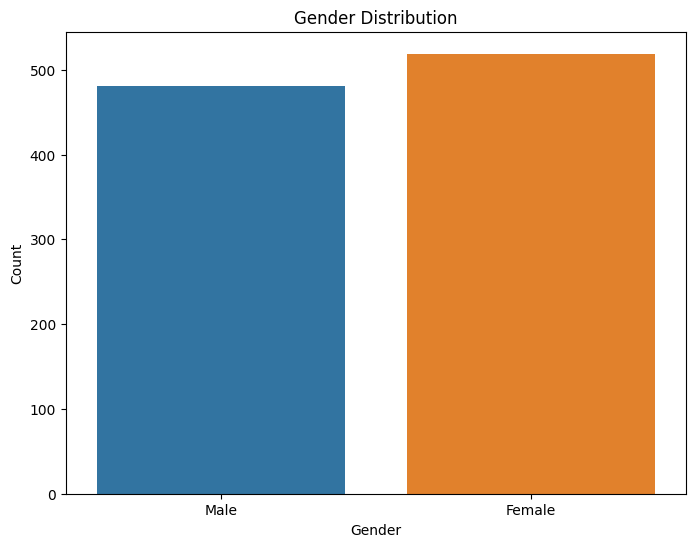

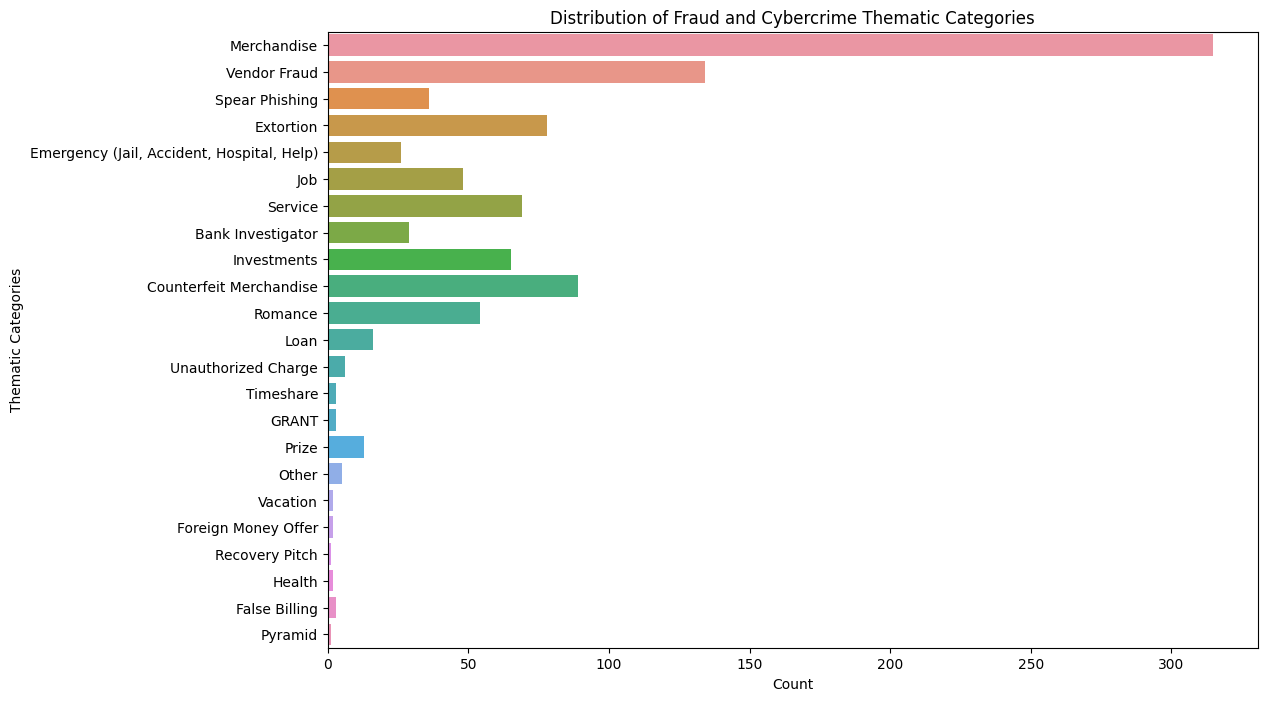

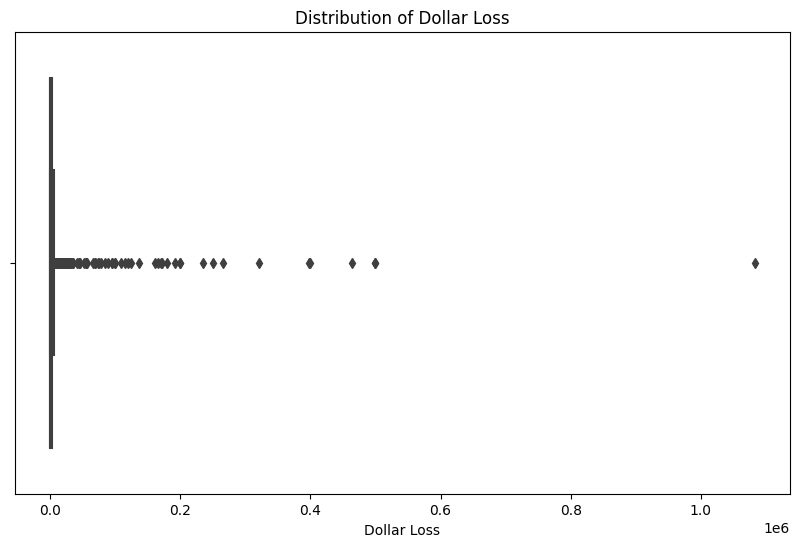

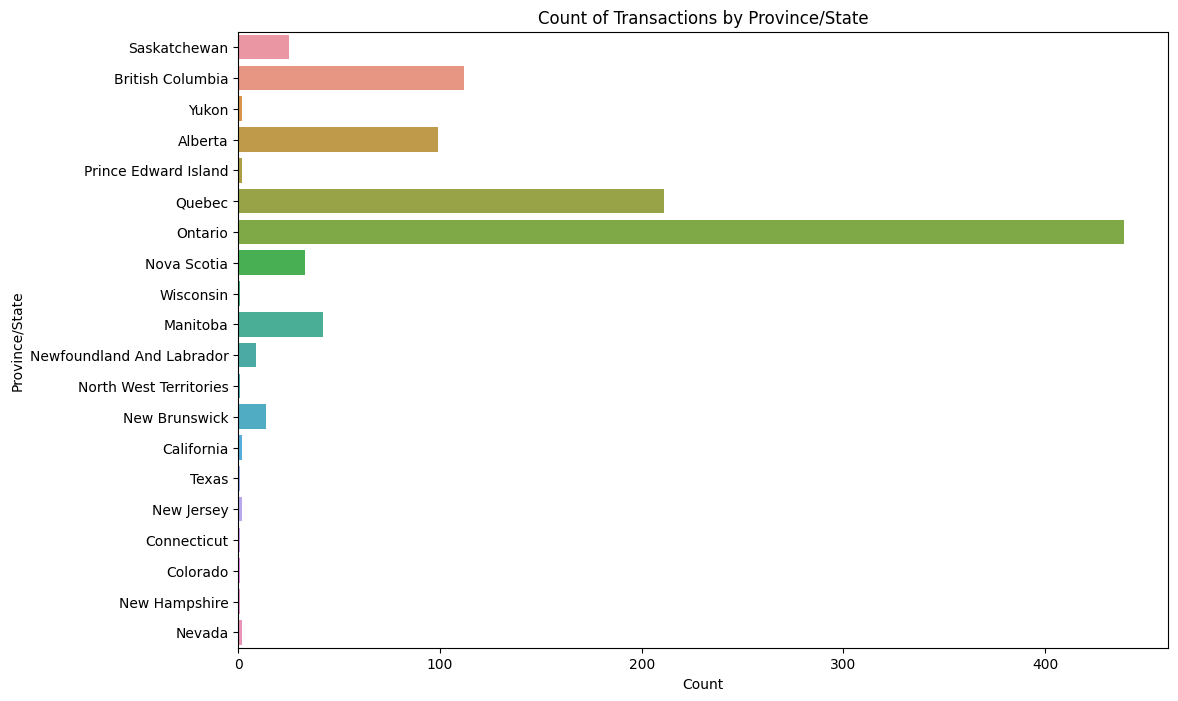

c:\Users\sneha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sneha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


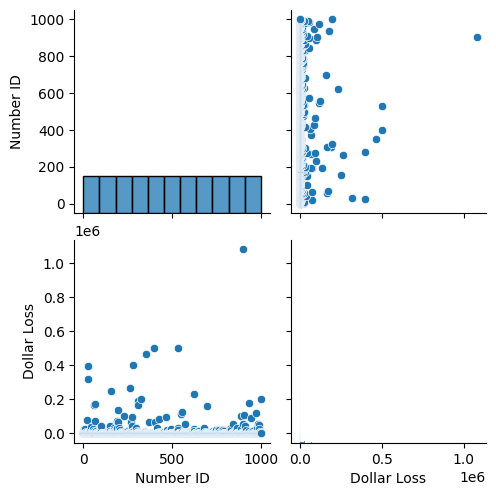

In [13]:
import seaborn as sns

# 1. Visualize the distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=cleaned_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Create a bar plot to show the distribution of fraud and cybercrime thematic categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Fraud and Cybercrime Thematic Categories', data=cleaned_data)
plt.title('Distribution of Fraud and Cybercrime Thematic Categories')
plt.xlabel('Count')
plt.ylabel('Thematic Categories')
plt.show()

# 3. Generate a box plot to visualize the distribution of dollar loss
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dollar Loss', data=cleaned_data)
plt.title('Distribution of Dollar Loss')
plt.xlabel('Dollar Loss')
plt.show()

# 4. Plot a bar chart to display the count of transactions by province/state
plt.figure(figsize=(12, 8))
sns.countplot(y='Province/State', data=cleaned_data)
plt.title('Count of Transactions by Province/State')
plt.xlabel('Count')
plt.ylabel('Province/State')
plt.show()

# 5. Create a pair plot to explore relationships between numerical variables
sns.pairplot(cleaned_data)
plt.show()
